<a href="https://colab.research.google.com/github/VPanadero2000/MLUCM2223/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preguntas:
1. debo comprobar si tengo datos duplicados?
2. no tengo que mirar nada de datos balanceados para regresión lineal así que de momento no lo hago no?

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns    #visualización
import matplotlib.pyplot as plt   #visualización
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

## 1. DESCRIPCIÓN DE LAS VARIABLES:
1. id - Unique ID for each home sold

2. date - Date of the home sale

3. price - Price of each home sold

4. bedrooms - Number of bedrooms

5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but 
no shower

6. sqft_living - Square footage of the apartments interior living space

7. sqft_lot - Square footage of the land space

8. floors - Number of floors

9. waterfront - A dummy variable for whether the apartment was overlooking the 
waterfront or not

10. view - An index from 0 to 4 of how good the view of the property was

11. condition - An index from 1 to 5 on the condition of the apartment,

12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

13. sqft_above - The square footage of the interior housing space that is above 
ground level

14. sqft_basement - The square footage of the interior housing space that is below ground level

15. yr_built - The year the house was initially built

16. yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in

17. zipcode

18. lat - Lattitude

19. long - Longitude

20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 2. VISUALIZACIÓN DE LOS DATOS

In [135]:
#Leemos la base de datos con la que vamos a trabajar:
df = pd.read_csv("kc_house_data.csv")
df.head(20) 
#nos llama la atención que variables como "bathrooms" y "floors" no sean enteras... (buscar cómo se codifica esto )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [137]:
df_c = df.copy()
df_c.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


a continuación quito la variable id, que sólo sirve para identificar las entradas y no lo voy a usar para nada (obviamente). Tampoco serán relevantes para nuestro análisis la variable 'date', así como las variables relacionadas con la ubicación ('zipcode', 'lat', 'long').

In [138]:
df_c = df_c.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_c.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


Ahora, me interesa convertir algunas variables categóricas en variables continuas. Otras, probablemente las elimine. Para convertir variables categóricas en continuas, me conviene mirar los mínimos y máximos que toman esas variables para poder reescalarlas... Hago tabla de estadísticos descriptivos:

In [139]:
df_c.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


La variable waterfront es una variable binaria que nos indica si la casa dispone de vistas al mar o no. Por su parte, la variable view nos indica la calidad de las vistas de la vivienda. Considerando que la primera implica la segunda y que encarece lo mismo el mar que la sierra, decidimos trabajar únicamente con view.

La variable 'view' es un índice de valores enteros entre 0 y 4, con 0 indicando malas vistas y 4 indicando buenísimas vistas. A continuación reescalaremos esta variable para convertirla en una variable continua que tome valores entre 0 y 1, con 0 indicando pésimas vistas y 1 indicando buenísimas vistas

Lo mismo haremos con las variables 'condition' y 'grade', que indican la condición de la casa (a nivel de estado de la vivienda) y la "categoría", respectivamente:

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_c[['view_s', 'condition_s', 'grade_s']] = scaler.fit_transform(df_c[['view', 'condition', 'grade']])
df_c = df_c.drop(['view', 'condition', 'grade', 'waterfront'], axis=1)

In [141]:
df_c.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_s,condition_s,grade_s
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,0.0,0.5,0.500000
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,0.0,0.5,0.500000
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,0.0,0.5,0.416667
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,0.0,1.0,0.500000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,0.0,0.5,0.583333


Ha continuación, estudiamos correlación entre las variables. Pudiera ser que variables como 'bedrooms' y 'bathrooms' tuviesen una alta correlación con variables como 'sqft_living'. De la misma manera, 'sqft_living' y 'sqft_lot' pueden estar correlacionadas con 'sqft_above' y 'sqft_basement'.

En el primero de los casos, pudiera ser interesante, por ejemplo, crear una variable que fuese habitaciones/superficie_habitable.... 

Lo vemos gráficamente:

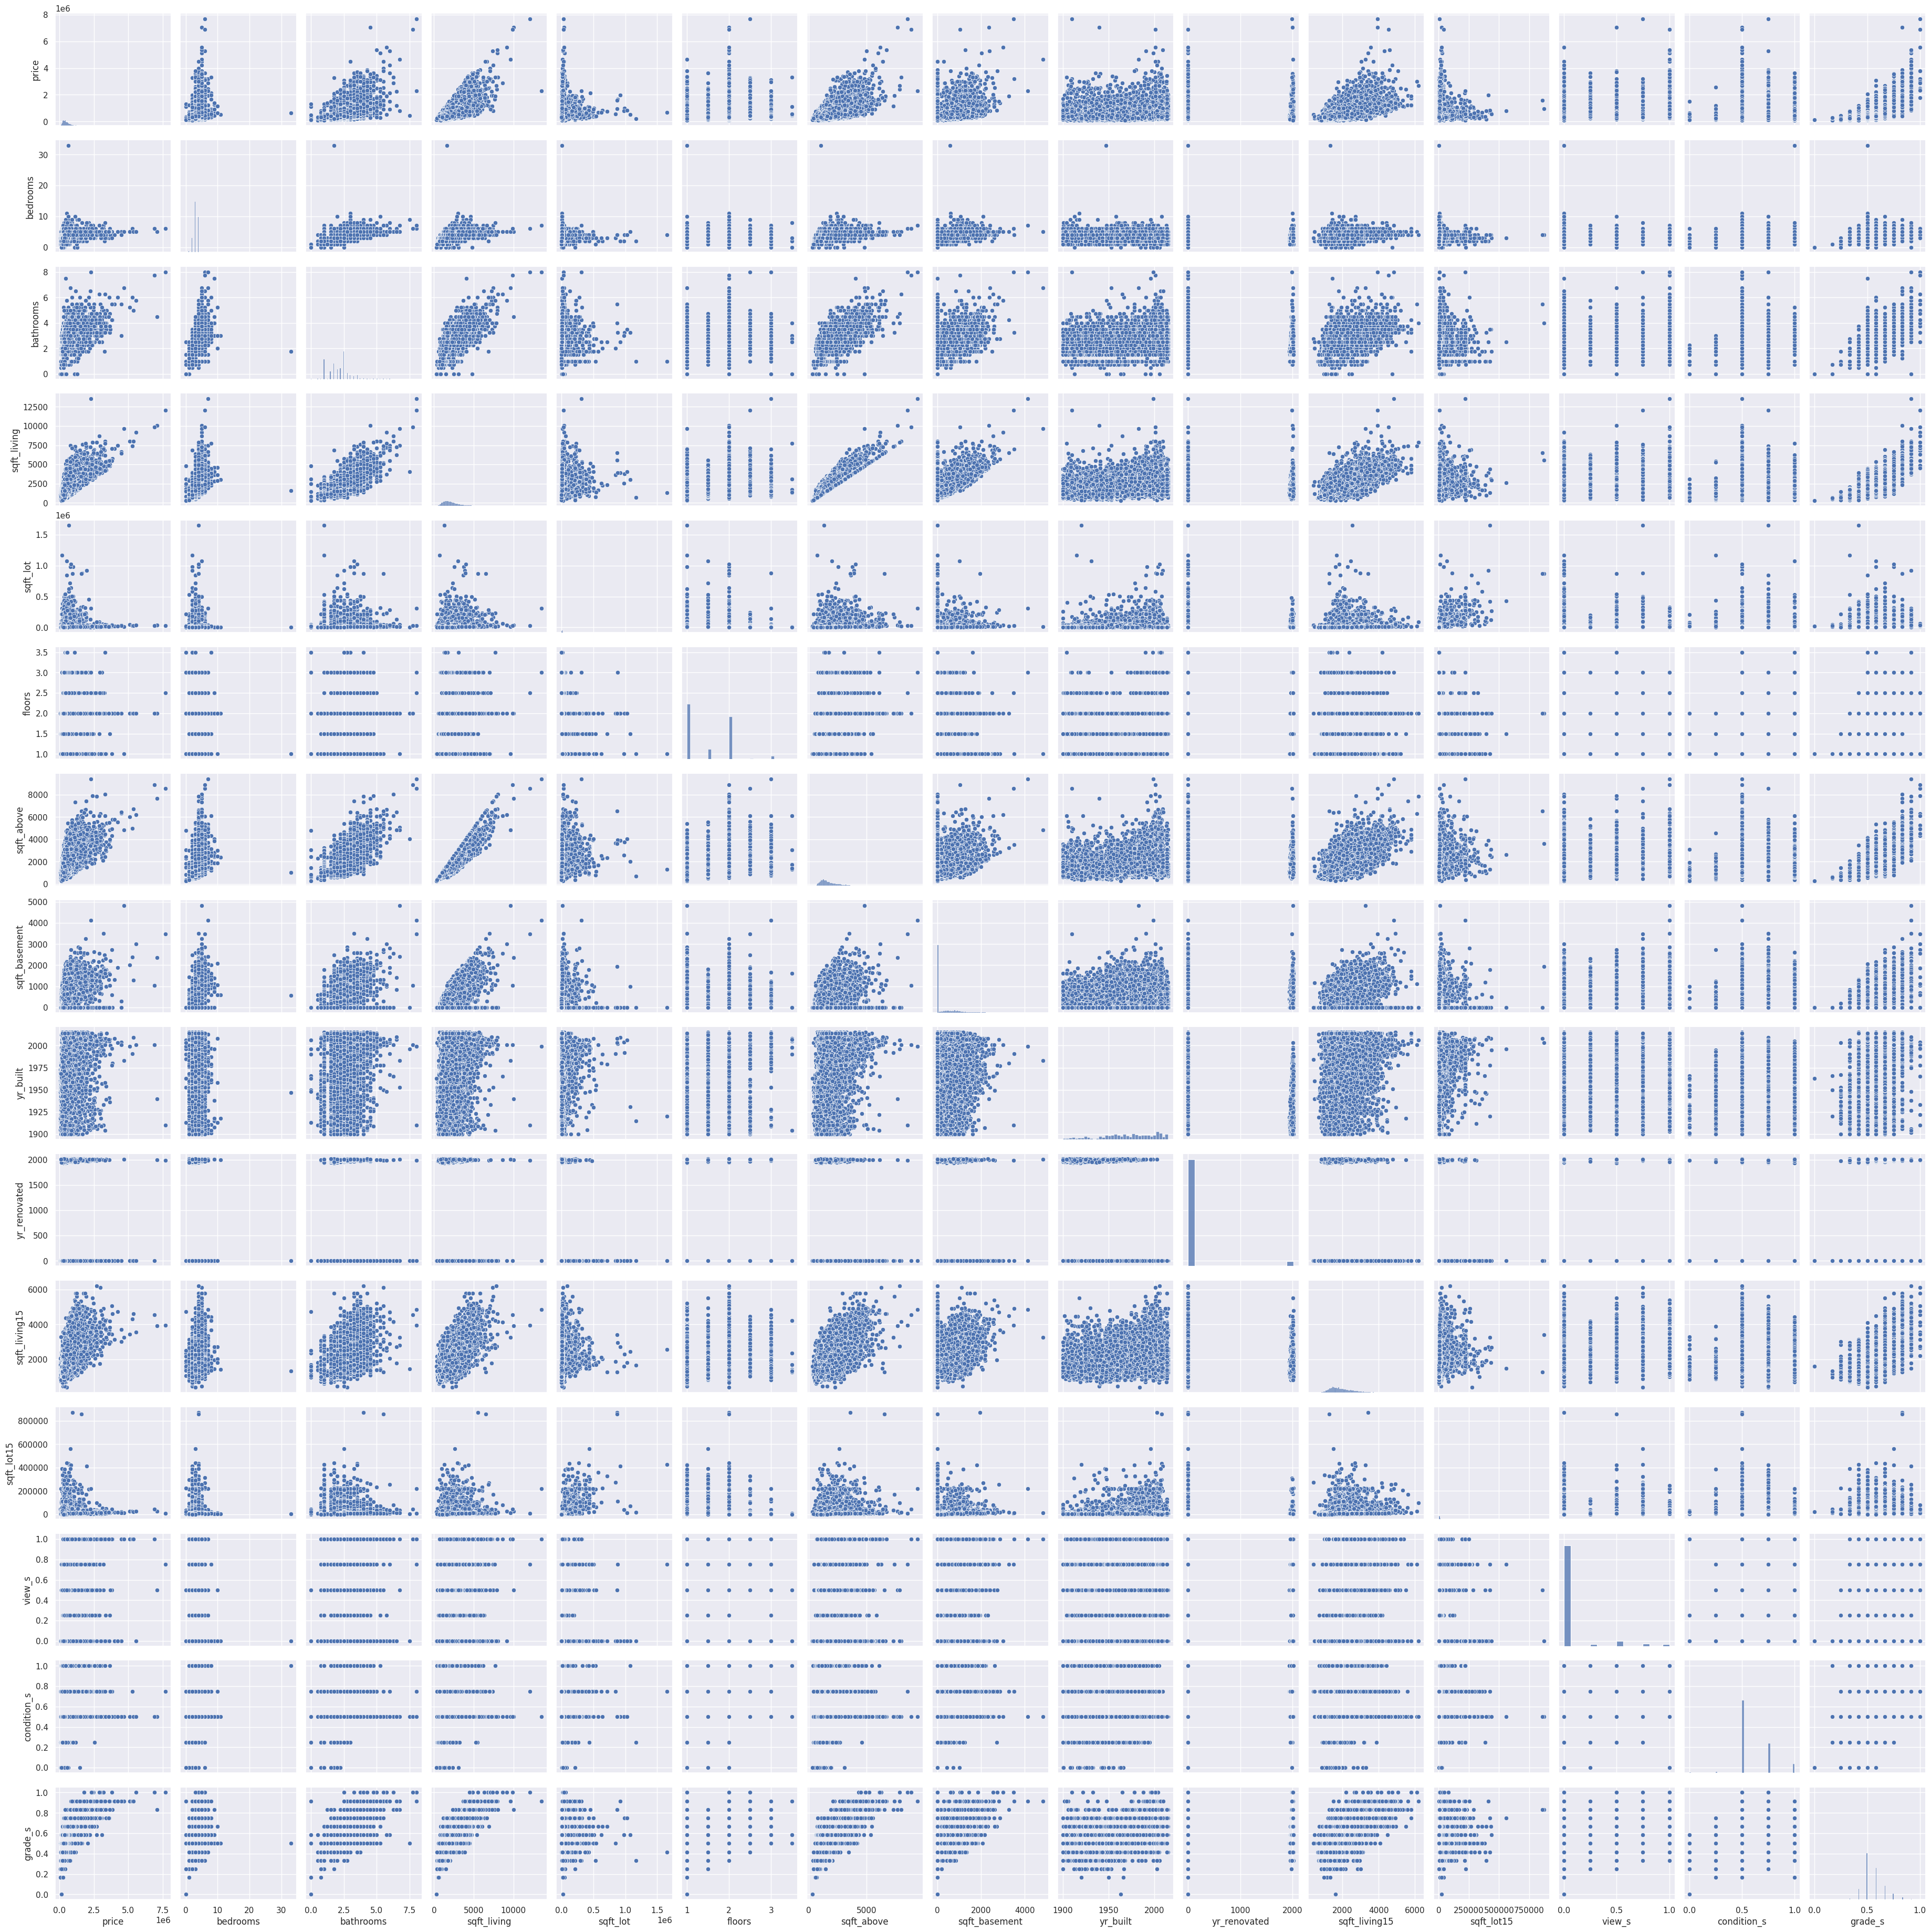

In [142]:
sns.pairplot(df_c,vars = df_c.columns)

Pues a priori, no parece que exista una correlación muy lineal entre bedrooms y sqft_living. Quizás, algo más con bathrooms, pero tampoco muy clara. 
Sin embargo, la relación entre sqft_living y sqft_above es prácticamente linear (luego vemos que hacemos con esto).

Vamos a sacar un heatmap:

<Axes: >

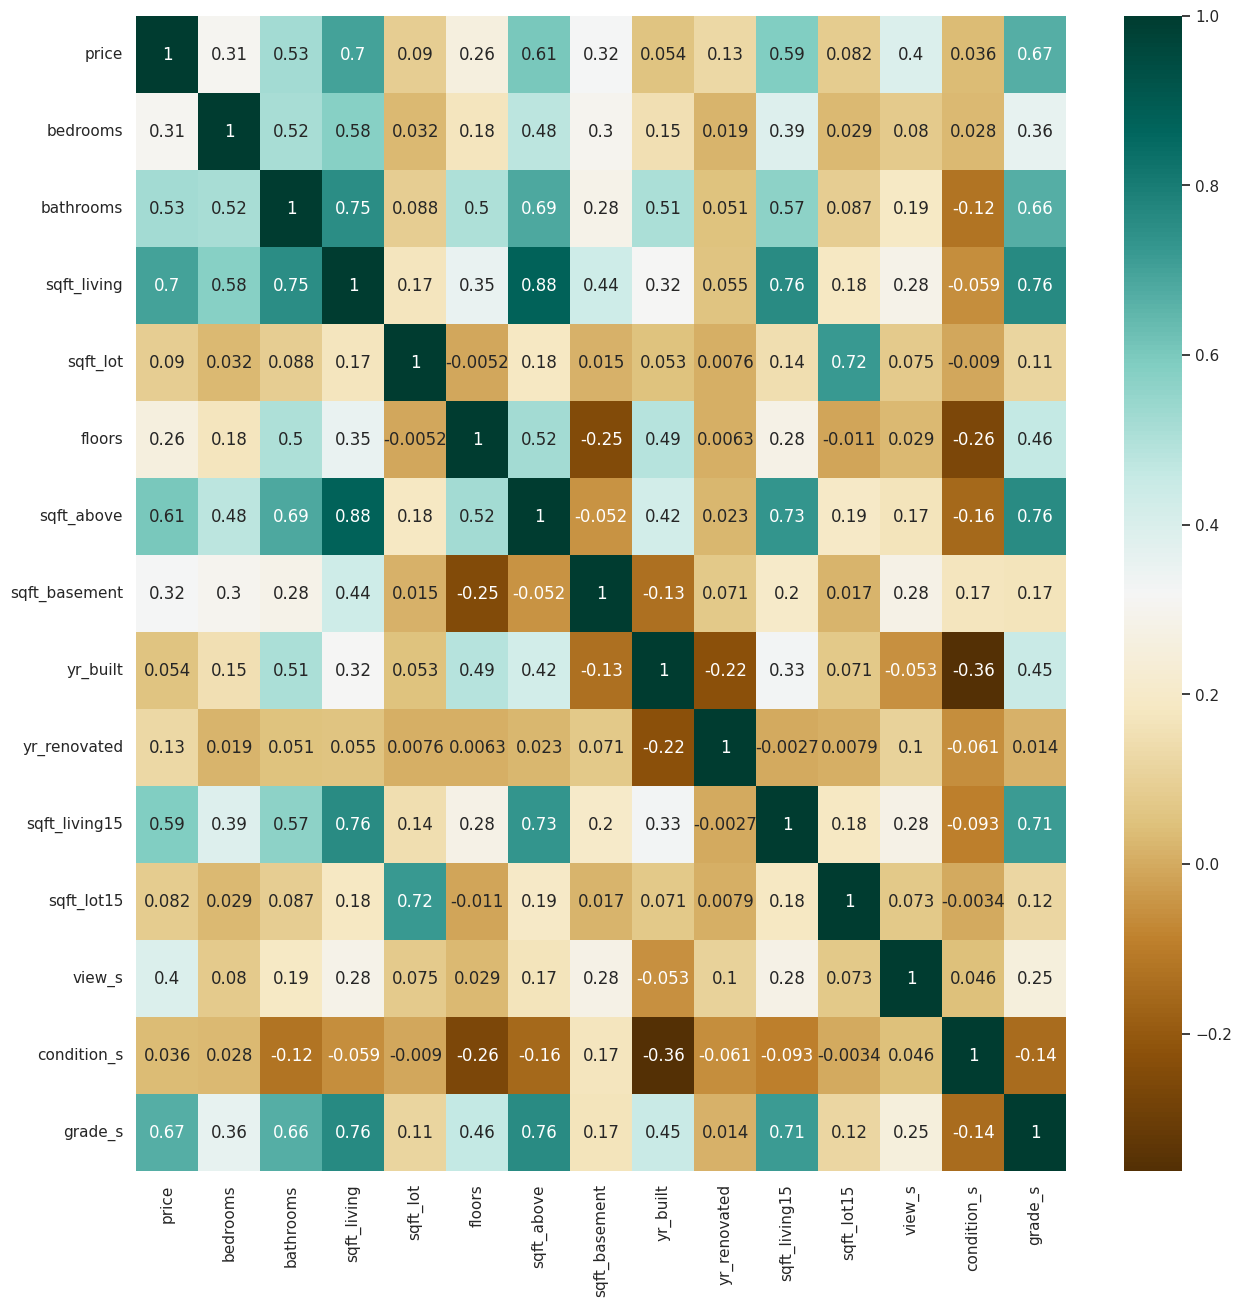

In [143]:
plt.figure(figsize=(15,15))
correlaciones= df_c.corr() #de nuevo, para hacer las correlaciones, quitamos la variable "Clases"
sns.heatmap(correlaciones,cmap="BrBG",annot=True) #para mapa de calor


Creo que podemos decir que están correlados (entre bedrooms y sqft_living por un lado y same con bathrooms...) Creamos bathrooms/sqft_living por un lado y bedrooms/sqft_living, por otro:

(NOTA: tb puedo estudiar la correlación no lineal entre las variables de la siguiente manera:
from scipy.stats import spearmanr

correlacion, p_valor = spearmanr(df['habitaciones'], df['sqft_living'])

print('Correlación de rango de Spearman:', correlacion)
print('p-valor:', p_valor)

preguntar si merece la pena incluirlo)

Por otro lado, nos parece interesante hacer este mismo cociente entre 'sqft_living' y 'sqft_lot'. (Aunque puede ser que acabemos por optar no usar esta variable), así como sqft_above/sqft_living (ya que hemos comprobado que tanto sqft_above como sqft_basement son superficies habitables (ver datos)).

In [144]:
df_c['bedrx_sqfti'] = df_c['bedrooms'] / df_c['sqft_living']
df_c['bathrx_sqftli'] = df_c['bathrooms'] / df_c['sqft_living']
df_c['sqftlix_sqftlot'] = df_c['sqft_living'] / df_c['sqft_lot']
df_c['sqftabx_sqftli'] = df_c['sqft_above'] / df_c['sqft_living']
df_c.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_s,condition_s,grade_s,bedrx_sqfti,bathrx_sqftli,sqftlix_sqftlot,sqftabx_sqftli
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,0.0,0.5,0.500000,0.002542,0.000847,0.208850,1.000000
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,0.0,0.5,0.500000,0.001167,0.000875,0.354874,0.844358
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,0.0,0.5,0.416667,0.002597,0.001299,0.077000,1.000000
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,0.0,1.0,0.500000,0.002041,0.001531,0.392000,0.535714
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,0.0,0.5,0.583333,0.001786,0.001190,0.207921,1.000000


#### 2.1 Tratamiento de outliers

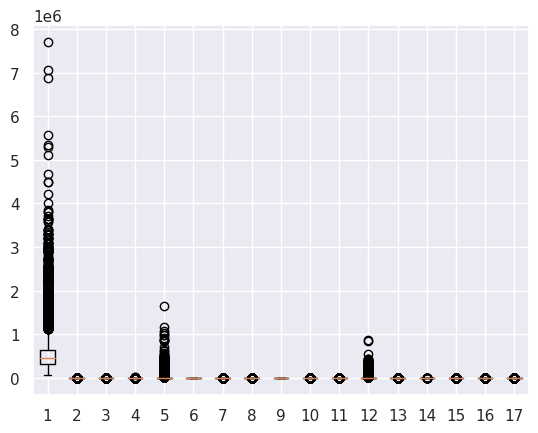

In [86]:
#a falta de ver qué más cosas hago con algunas variables (las relacionadas con superficie sobre todo, voy al tratamiento de 
#atípicos:
#En primer lugar, hacemos análisis gráfico boxplot:
data = [df_c['price'], df_c['bedrooms'], df_c['bathrooms'], df_c['sqft_living'], df_c['sqft_lot'], df_c['floors'],
        df_c['sqft_above'], df_c['sqft_basement'], df_c['yr_built'], df_c['yr_renovated'], df_c['sqft_living15'], 
        df_c['sqft_lot15'], df_c['view_s'], df_c['condition_s'], df_c['grade_s'], df_c['bedrx_sqfti'], 
        df_c['bathrx_sqftli']]
plt.boxplot(data)
plt.show()

Parece que hay presencia de atípicos en todas laas variables. Los puedo identificar como se ha hecho abajo, o con mahalanobi, pero no sé si imputar datos o eliminar... PFFFF

In [87]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_price = df['price'][(df['price'] < lower_limit) | (df['price'] > upper_limit)]
outliers_price

5        1225000.0
21       2000000.0
49       1350000.0
69       1325000.0
125      1450000.0
           ...    
21568    1700000.0
21576    3567000.0
21590    1222500.0
21597    1575000.0
21600    1537000.0
Name: price, Length: 1146, dtype: float64

In [88]:
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot = df['sqft_lot'][(df['sqft_lot'] < lower_limit) | (df['sqft_lot'] > upper_limit)]
outliers_sqft_lot

5        101930
12        19901
21        44867
36        34848
41        24186
          ...  
21494     62726
21506    130017
21520     50621
21525    108865
21548    184231
Name: sqft_lot, Length: 2425, dtype: int64

In [53]:
Q1 = df['sqft_lot15'].quantile(0.25)
Q3 = df['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot15 = df['sqft_lot15'][(df['sqft_lot15'] < lower_limit) | (df['sqft_lot15'] > upper_limit)]
outliers_sqft_lot15

5        101930
21        20336
41        30617
49        72513
60        18900
          ...  
21520     74052
21525    107498
21532     50447
21548    151081
21576     18270
Name: sqft_lot15, Length: 2194, dtype: int64

In [89]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot15 = df['sqft_living'][(df['sqft_living'] < lower_limit) | (df['sqft_living'] > upper_limit)]
outliers_sqft_lot15

5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21551    4350
21561    4500
21576    4850
21590    4910
21600    4470
Name: sqft_living, Length: 572, dtype: int64

(SUPUESTO QUE HEMOS TRATADO LOS OUTLIERS)
## 3. ELECCIÓN DE VARIABLES

Vamos a querer regresar linealmente el precio respecto algunas de las variables. Para elegir las variables que queremos utilizar, vamos a tratar de darles orden de importancia bajo criterios de correlación. Además, si alguna variable nos parece interesante, pues también la incluimos:

In [145]:
matriz_corr = df_c.corr()
matriz_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_s,condition_s,grade_s,bedrx_sqfti,bathrx_sqftli,sqftlix_sqftlot,sqftabx_sqftli
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.397293,0.036362,0.667434,-0.468367,-0.267903,0.123115,-0.135539
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,0.079532,0.028472,0.356967,0.062749,-0.233817,0.026637,-0.196172
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,0.187737,-0.124982,0.664983,-0.517869,0.194445,0.286338,-0.128827
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,0.284611,-0.058753,0.762704,-0.678042,-0.435384,0.077223,-0.207346
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.074710,-0.008958,0.113621,-0.137271,-0.117548,-0.252697,0.029353
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,0.029444,-0.263768,0.458183,-0.312995,0.166354,0.557030,0.345513
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050,0.167649,-0.158214,0.755923,-0.601928,-0.353762,0.051908,0.257840
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,-0.133124,0.071323,0.200355,0.017276,0.276947,0.174105,0.168392,-0.280835,-0.241604,0.063132,-0.912726
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,0.423898,-0.133124,1.000000,-0.224874,0.326229,0.070958,-0.053440,-0.361417,0.446963,-0.295111,0.213799,0.279186,0.197935
yr_renovated,0.126434,0.018841,0.050739,0.055363,0.007644,0.006338,0.023285,0.071323,-0.224874,1.000000,-0.002673,0.007854,0.103917,-0.060618,0.014414,-0.049962,-0.019620,-0.003397,-0.047713


Ordenamos las correlaciones de la variable price con el resto de variables para identificar mejor las variables más correlacionadas con la misma:

In [146]:
matriz_corr["price"].sort_values(ascending=False)

price              1.000000
sqft_living        0.702035
grade_s            0.667434
sqft_above         0.605567
sqft_living15      0.585379
bathrooms          0.525138
view_s             0.397293
sqft_basement      0.323816
bedrooms           0.308350
floors             0.256794
yr_renovated       0.126434
sqftlix_sqftlot    0.123115
sqft_lot           0.089661
sqft_lot15         0.082447
yr_built           0.054012
condition_s        0.036362
sqftabx_sqftli    -0.135539
bathrx_sqftli     -0.267903
bedrx_sqfti       -0.468367
Name: price, dtype: float64

Parece que serán importantes variables como:
'sqft_living', 'grade_s', 'sqft_above', 'sqft_living15', 'bathrooms', 'view_s'... hasta 'floor' quizás. 

No obstante, sqft_above y sqft_living están muy correlacionadas (0.88), por lo que igual no conviene incluirlas a las dos. Como, por otro lado, no queremos olvidarnos de la importancia de la proporción de superficie habitable por encima del nivel del suelo, probablemente utilizarremos la variable cociente sqftabx_sqftli (aunque nos chirría esa correlación negativa...)

Además, también creemos que puede ser interesante incluir las variables cocientes bedrx_sqftli, bathrx_sqftli, y sqftlix_sqftlot (esta última para no olvidarnos de sqft_lot, que por sí sóla no parece ser súper importante, pero que gana algo de importancia si la tenemos encuenta de esta manera)

